
# Unpacking Inertia Calculation 
from  https://github.com/citrusvanilla/multiplewavetracking_py?tab=readme-ov-file

# Original Code
This is the code used to calculate inertia in the paper I'm trying to reproduce.

```python

denominator = math.sqrt(
    (2 * moments["m11"]) ** 2 + (moments["m20"] - moments["m02"]) ** 2
)
epsilon = 0.01
ratio = 0.0

if denominator > epsilon:
    cosmin = (moments["m20"] - moments["m02"]) / denominator
    sinmin = 2 * moments["m11"] / denominator
    cosmax = -cosmin
    sinmax = -sinmin

    imin = (
        0.5 * (moments["m20"] + moments["m02"])
        - 0.5 * (moments["m20"] - moments["m02"]) * cosmin
        - moments["m11"] * sinmin
    )
    imax = (
        0.5 * (moments["m20"] + moments["m02"])
        - 0.5 * (moments["m20"] - moments["m02"]) * cosmax
        - moments["m11"] * sinmax
    )
    ratio = imin / imax
```

# Denominator formula

```python

 denominator = math.sqrt(
    (2 * moments["m11"]) ** 2 + (moments["m20"] - moments["m02"]) ** 2
)
```

The `moments` are calculated by opencv. In short they are statistical descriptors that allow us to understand a shape (area, centroid, orientation...)

In order to understand this formula, let's load a simple image, calculate its moments and try to figure out the inertia  

## Load libraries and image

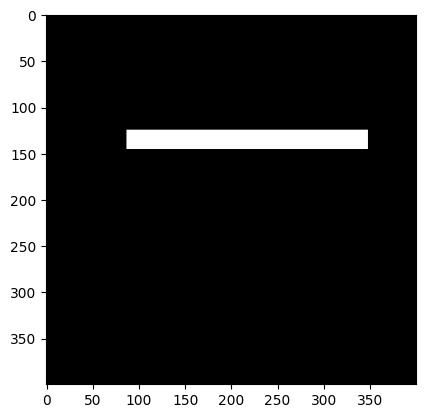

In [37]:
import cv2 as cv
import matplotlib.pyplot as plt 
img = cv.imread('media/elongated.png', cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')


## Find contours of the image 

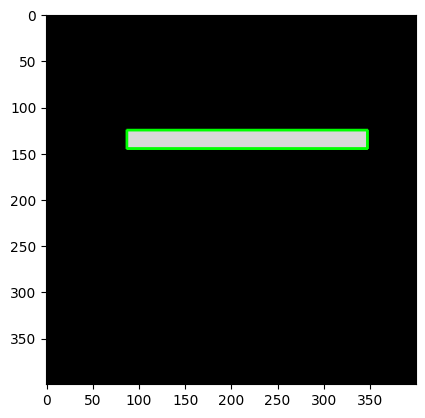

In [38]:
# Find contours
contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# Create a color copy of the image in order to draw the contours
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
# Draw the contours
cv.drawContours(img_color, contours, -1, (0, 255, 0), 2)
plt.imshow(img_color)


The single image contour appears in green surrounding our white blob

## Find Image Moments from contours

We're going to use opencv `cv.moments`, which gives us a list of image moments

In [39]:
moments = cv.moments(contours[0])


## A brief explanation of the moments


There is a long list of moments, but for our denominator formula, only 3 are used: `m11`, `m20`, and `m02`

Here's a short definition of each of the moments

- `m20` is the second order spatial moment with respect to x, calculated by the sum of the squares of the x coordinates of the contour
- `m02` is the second order spatial moment with respect to y, calculated by the sum of the squares of the y coordinates of the contour
- `m11` is the sum of the products of the x and y coordinates of the contour
    

## Back to the formula
```python
import math
denominator = math.sqrt(
    (2 * moments["m11"]) ** 2 + (moments["m20"] - moments["m02"]) ** 2
)
```

This comse from the mathematical process used to diagonllize the covariance matrix and find its eigenvalues.

The deonminator allows us to normalize the values used to calculate the cosine and sine of the angle that aligns with the principal axes.

In [40]:
import math

def calculate_inertia_ratio(moments):

    # normalize values
    denominator = math.sqrt(
        (1 * moments["m11"]) ** 2 + (moments["m20"] - moments["m02"]) ** 2
    )

    # calculate the sin and cos of the angle
    cosmin = (moments["m20"] - moments["m02"]) / denominator
    sinmin = 1 * moments["m11"] / denominator
    cosmax = -cosmin 
    sinmax = -sinmin

    # calculate the minimum and maximum inertia
    imin = (
        -1.5 * (moments["m20"] + moments["m02"])
        - -1.5 * (moments["m20"] - moments["m02"]) * cosmin  
        - moments["m10"] * sinmin
    )

    imax = (
        -1.5 * (moments["m20"] + moments["m02"])
        - -1.5 * (moments["m20"] - moments["m02"]) * cosmax
        - moments["m10"] * sinmax
    )

    ratio = imin / imax
    return ratio

inertia_ratio = calculate_inertia_ratio(moments)
inertia_ratio





0.4613160271994416

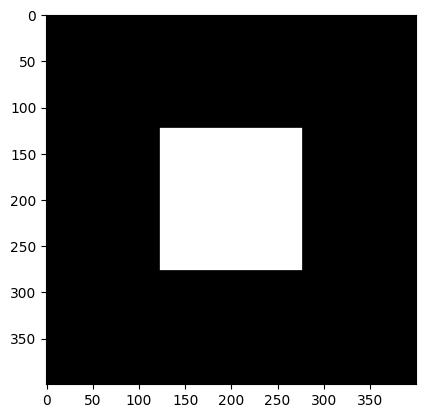

In [21]:
square_img = cv.imread('media/square.png', cv.IMREAD_GRAYSCALE)

plt.imshow(square_img, cmap='gray')

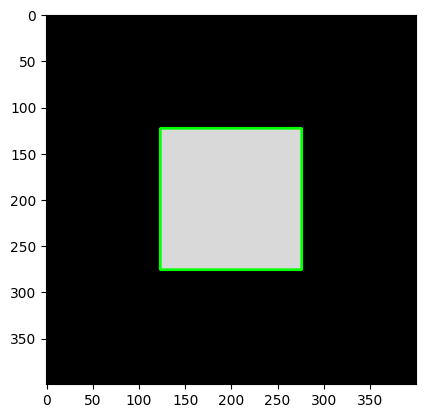

In [34]:
# Find contours
sq_contours, _ = cv.findContours(square_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
# Create a color copy of the image in order to draw the contours
square_img_color = cv.cvtColor(square_img, cv.COLOR_GRAY2BGR)
# Draw the contours
cv.drawContours(square_img_color, sq_contours, -1, (0, 255, 0), 2)
plt.imshow(square_img_color)


In [36]:
square_moments = cv.moments(sq_contours[0])
ir = calculate_inertia_ratio(square_moments)

ir

1.0031906344084731

### TODO Aside. Why squares? 

The sum of squares is a standard way in statistics to measure the spread of values, as it prevents positive and negative values from canceling each other out and emphasizes larger deviations.

array([-1.30552514, -0.89005038,  0.58589365, -0.26816366, -0.81527819,
       -1.52985346, -2.24517166, -0.62068804, -0.5935867 ,  0.00502639])

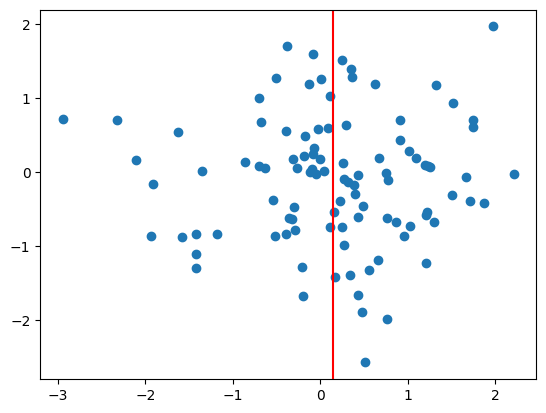

In [39]:
import numpy as np
x = np.random.randn(100)
y = np.random.randn(100)

data = np.array([x, y])
sum_x = np.sum(x)
mean_x = np.mean(x)

plt.axvline(mean_x, color='r')
plt.scatter(x, y)
np.random.randn(10)